In [3]:
# This script is used to run the detection script in the VBT module.
import sys
import os
current_dir = os.path.dirname(os.path.abspath('__file__'))
print(f'Current Directory: {current_dir}')
root_dir = os.path.abspath(os.path.join(current_dir, '..'))

if os.path.exists(root_dir):
    print(f'Root Directory exists: {root_dir}')
else:
    print(f'Root Directory does NOT exist: {root_dir}')

if root_dir not in sys.path:
    sys.path.append(root_dir)
    print(f'Added {root_dir} to sys.path')


try:
    from BounceInsight import BounceInsight
    print("Successfully imported BounceInsight")
except ModuleNotFoundError:
    print("VBT module not found. Please check the module path.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    
try:
    %reload_ext autoreload
except:
    %load_ext autoreload

%autoreload 2
    
csv_path = os.path.abspath(os.path.join(current_dir, 'files/loader'))
boin = BounceInsight(csv_path, "bounce")

Current Directory: C:\Users\timos\Desktop\BounceInsight
Root Directory exists: C:\Users\timos\Desktop
Successfully imported BounceInsight


Processing 19_bounce70b1.csv:   0%|          | 0/24 [00:00<?, ?it/s]

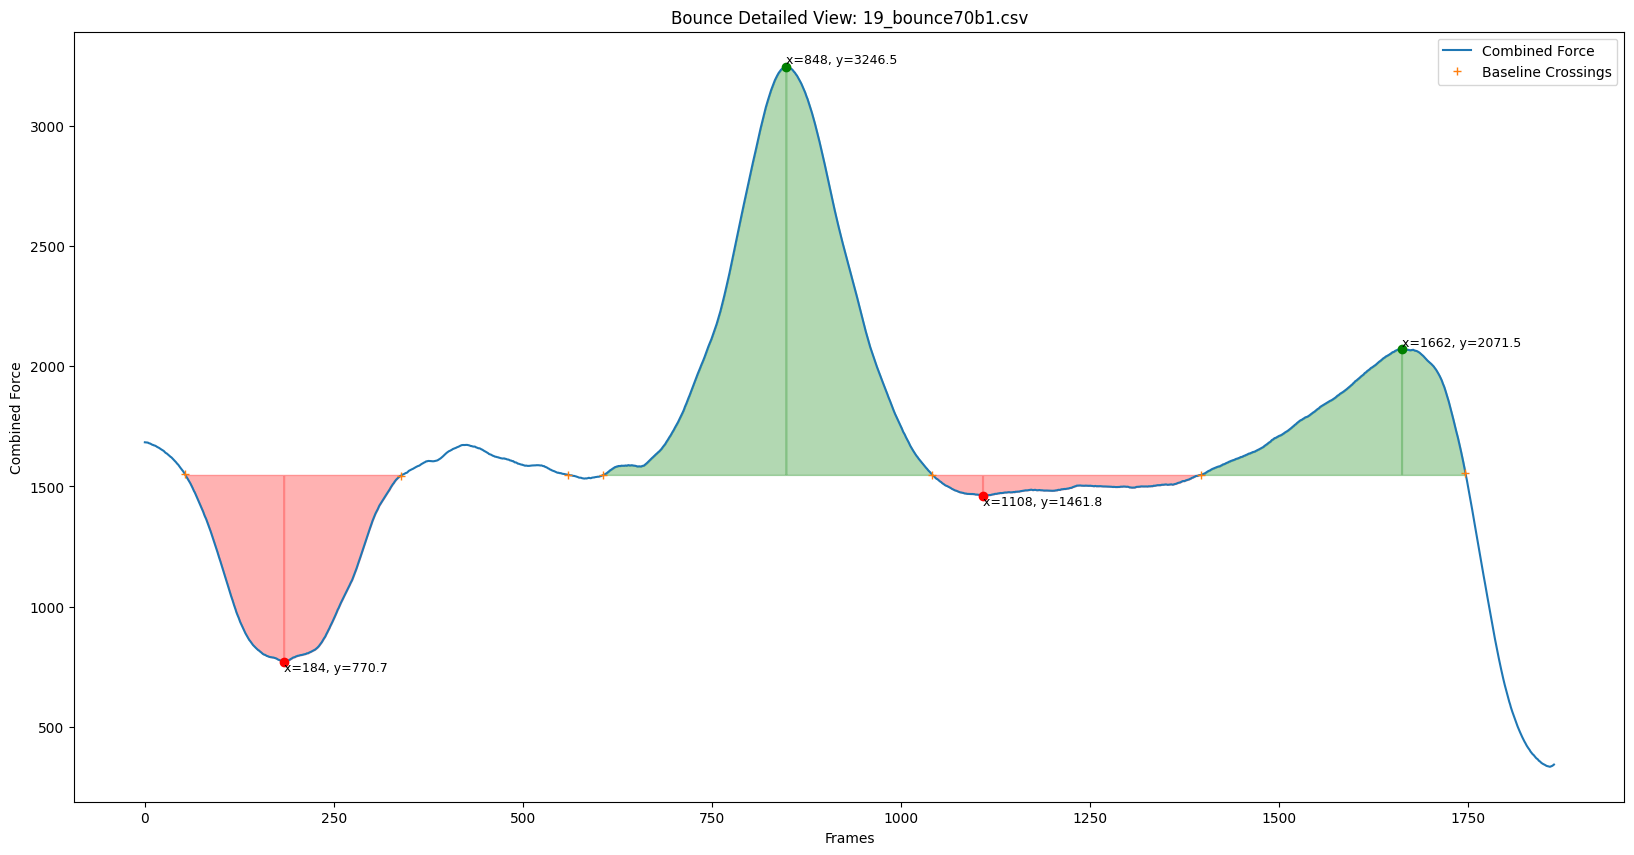

Processing 19_bounce70b2.csv:   4%|▍         | 1/24 [00:00<00:06,  3.41it/s]

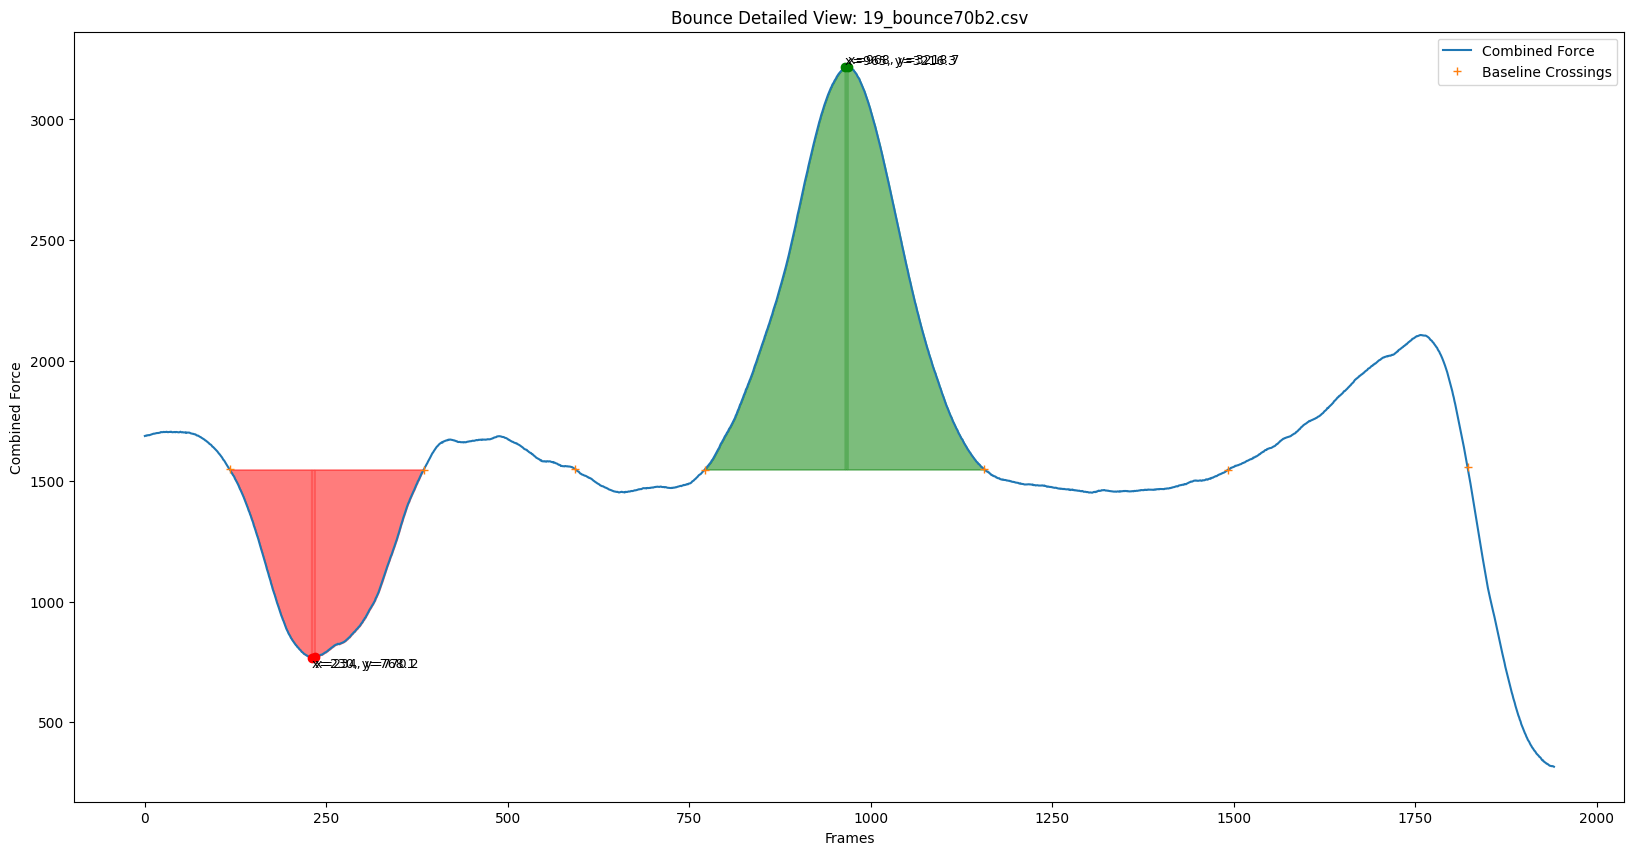

Processing 19_bounce70b3.csv:   8%|▊         | 2/24 [00:00<00:06,  3.52it/s]

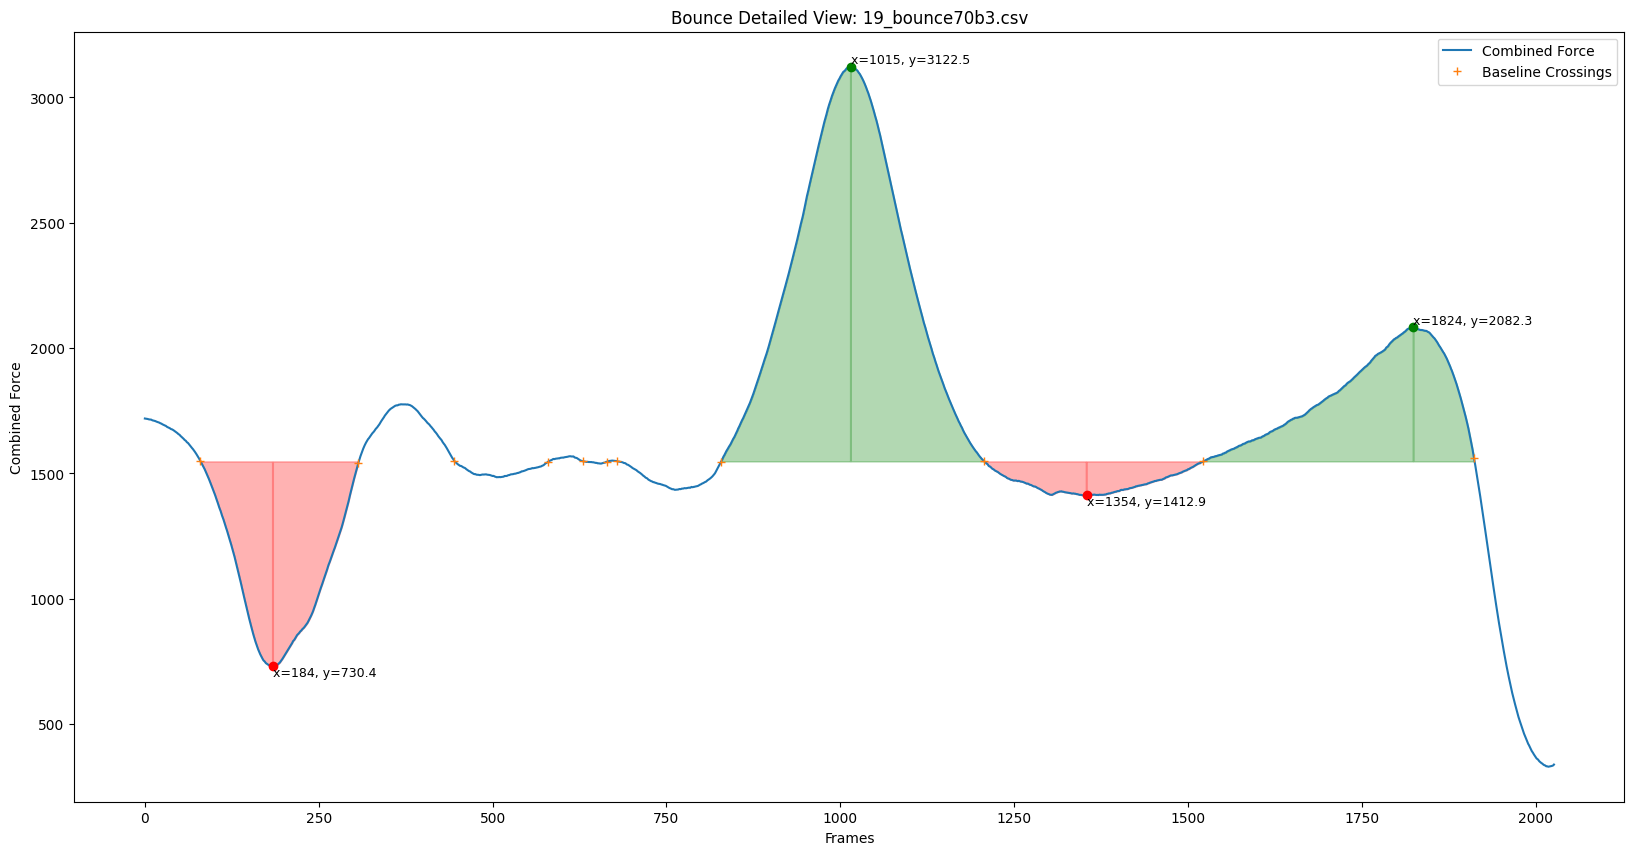

Processing 19_bounce70nb1.csv:  12%|█▎        | 3/24 [00:00<00:06,  3.44it/s]

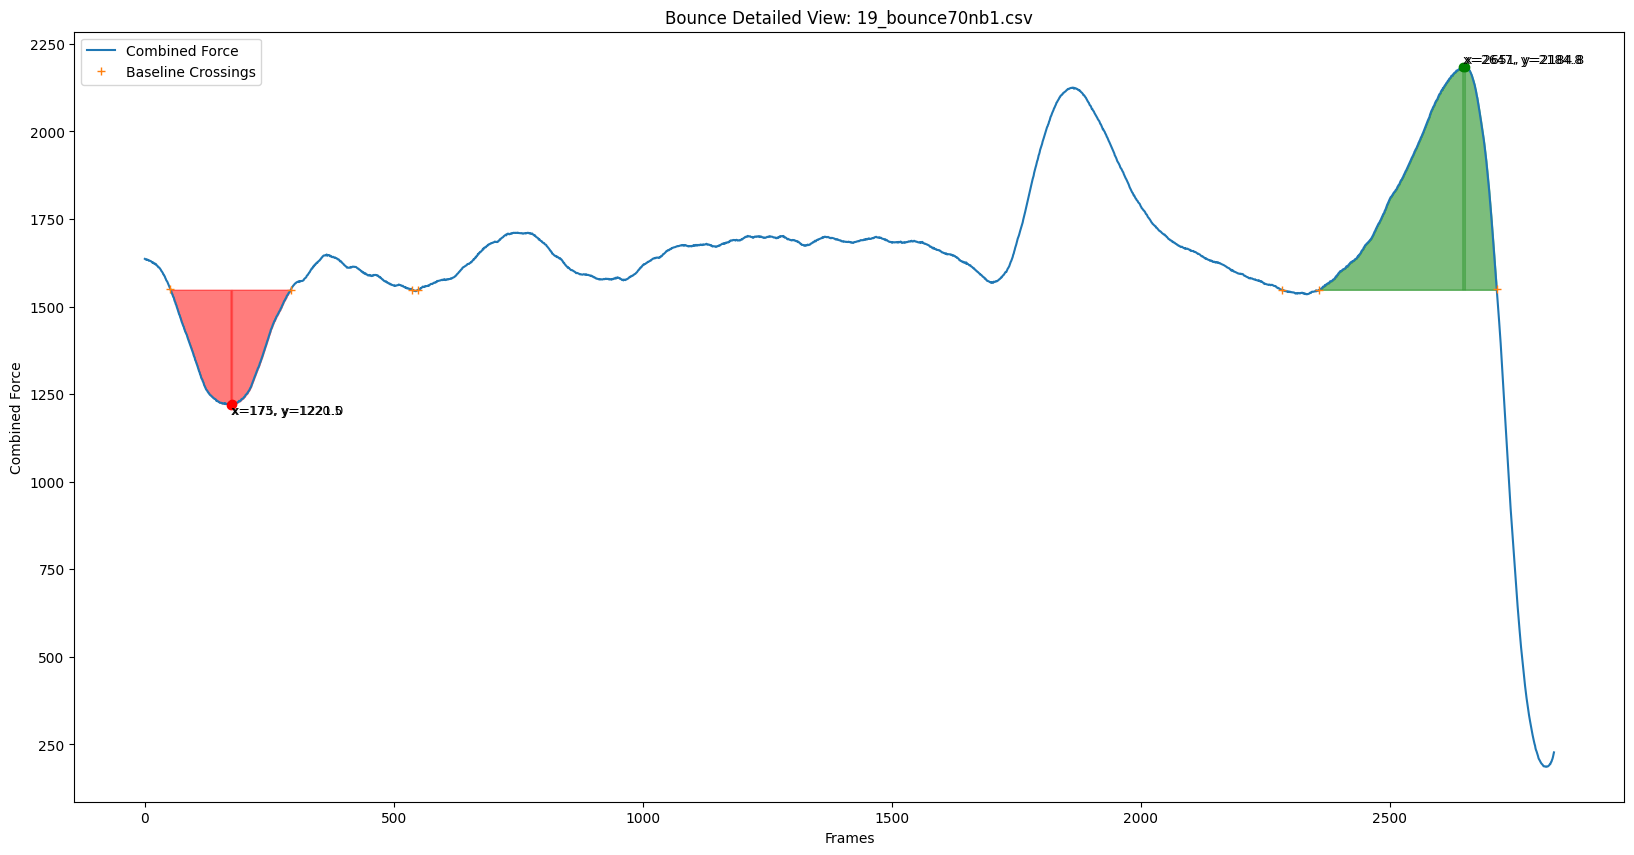

Processing 19_bounce70nb2.csv:  17%|█▋        | 4/24 [00:01<00:05,  3.35it/s]

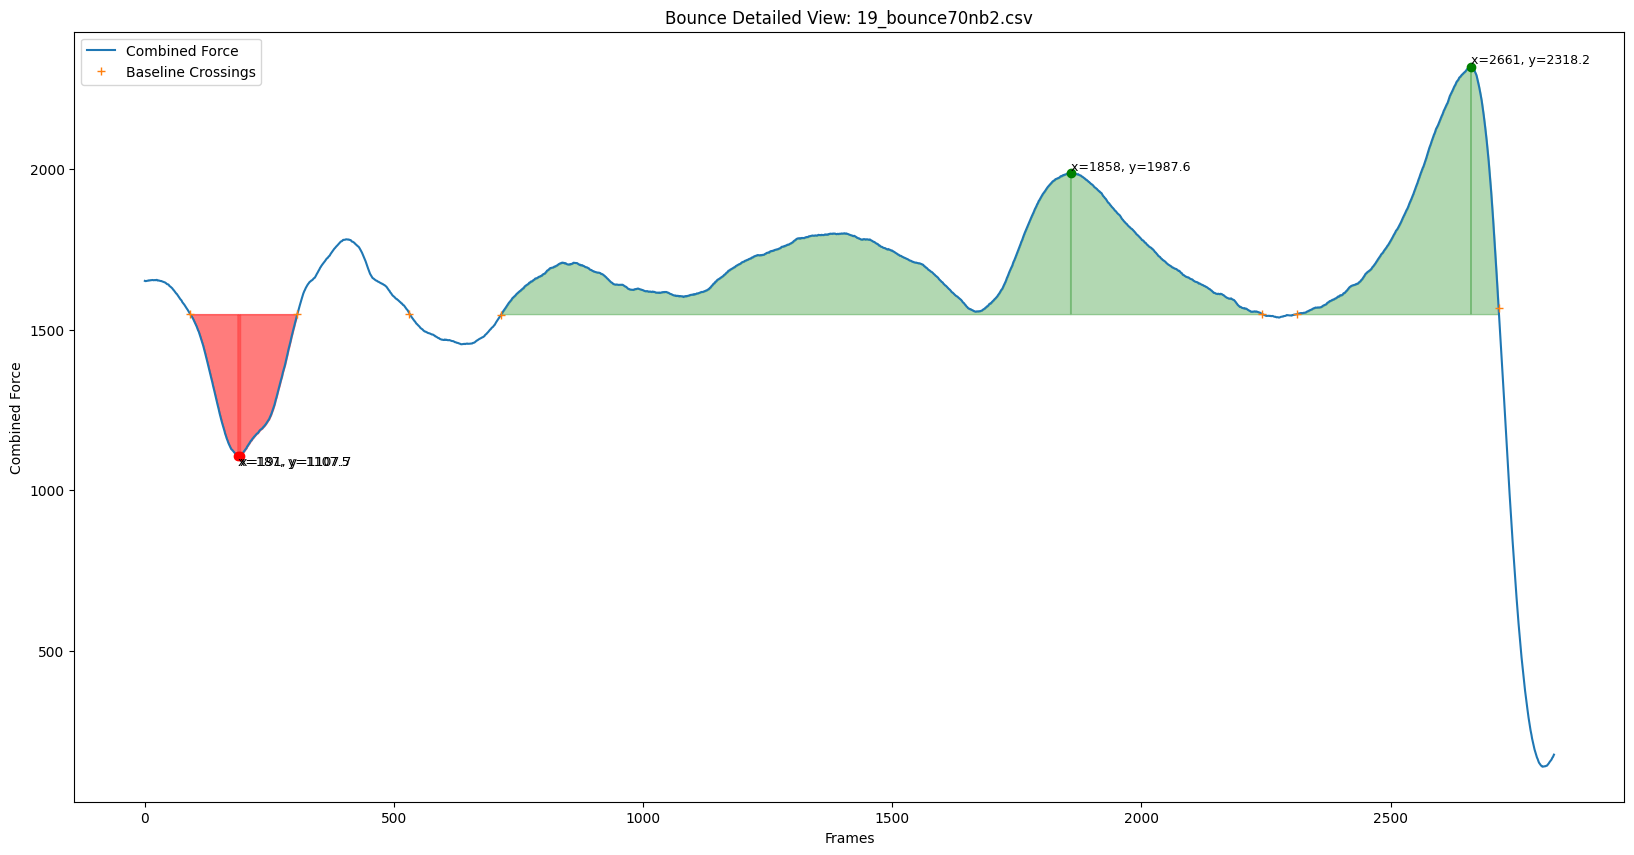

Processing 19_bounce70nb3.csv:  21%|██        | 5/24 [00:01<00:05,  3.41it/s]

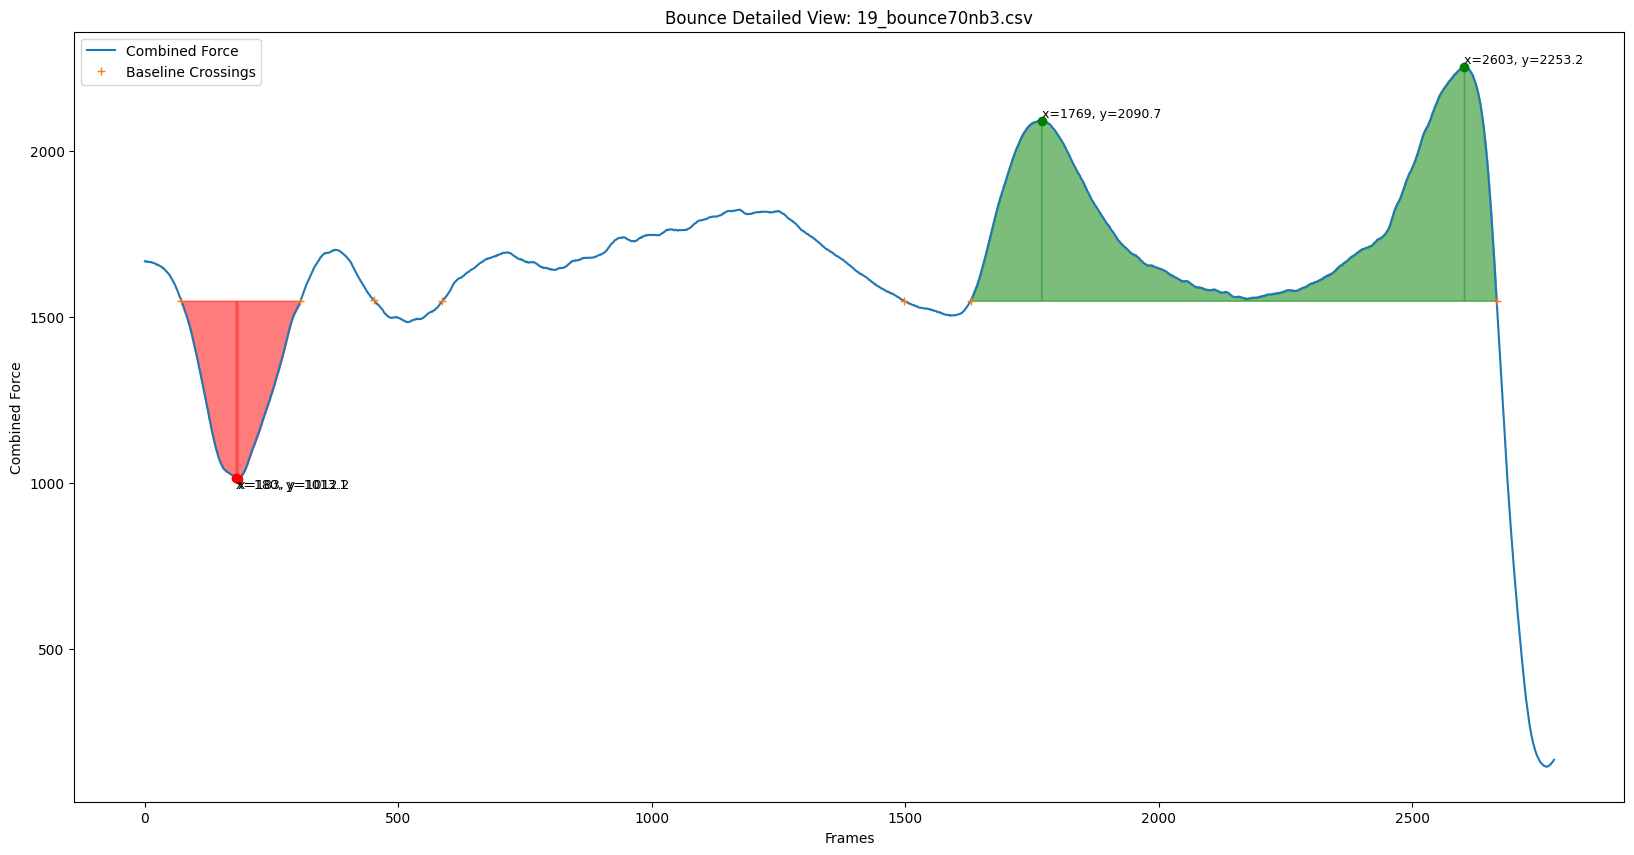

Processing 19_bounce80b1.csv:  25%|██▌       | 6/24 [00:01<00:05,  3.51it/s] 

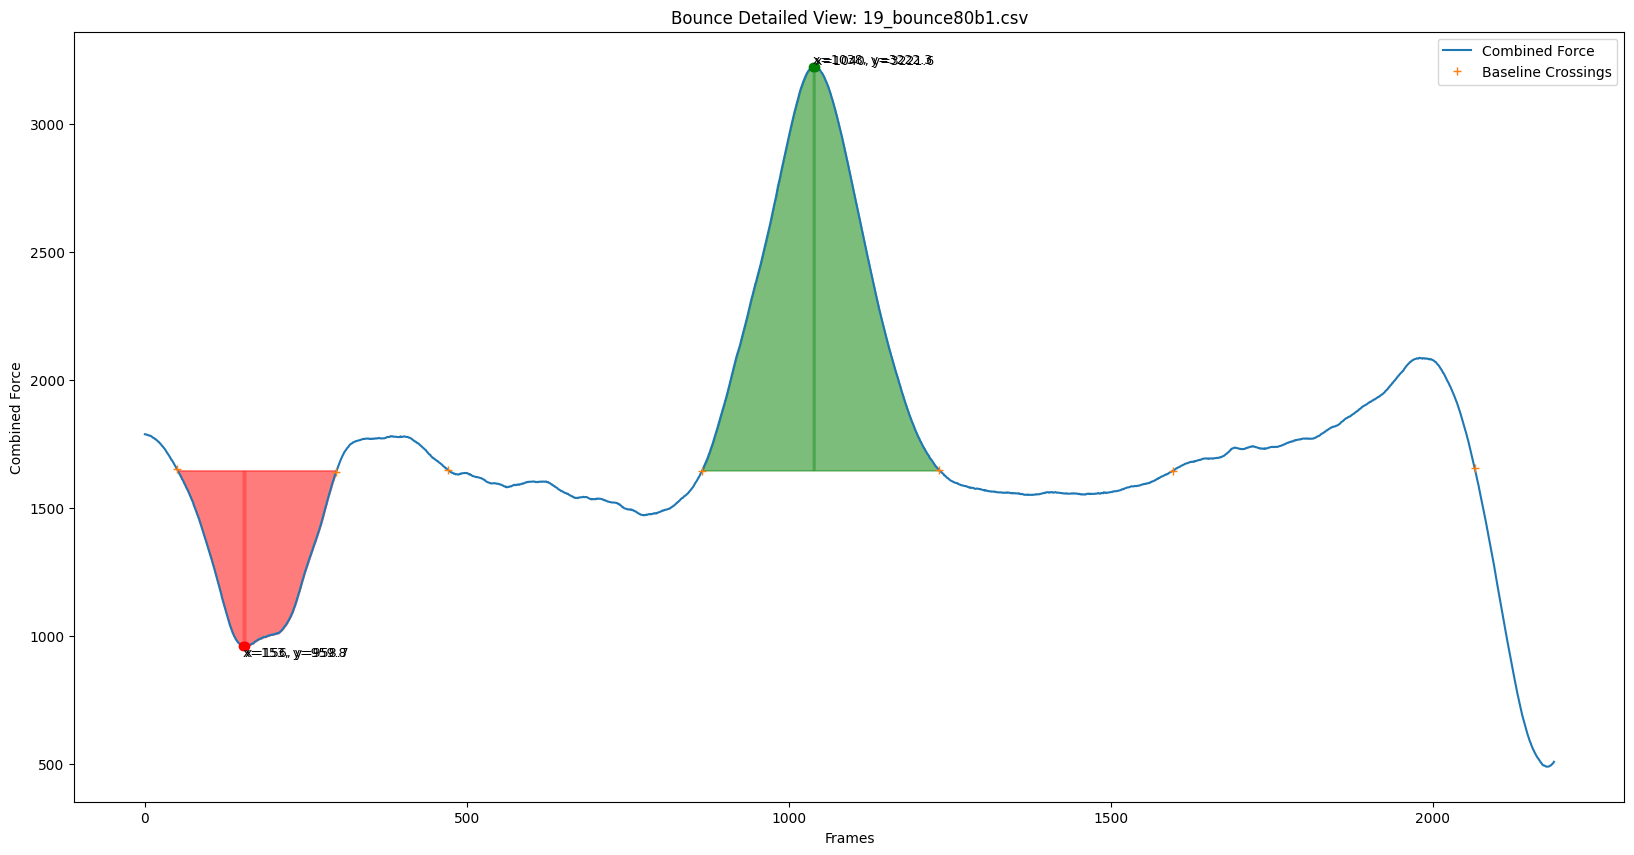

Processing 19_bounce80b2.csv:  29%|██▉       | 7/24 [00:02<00:04,  3.58it/s]

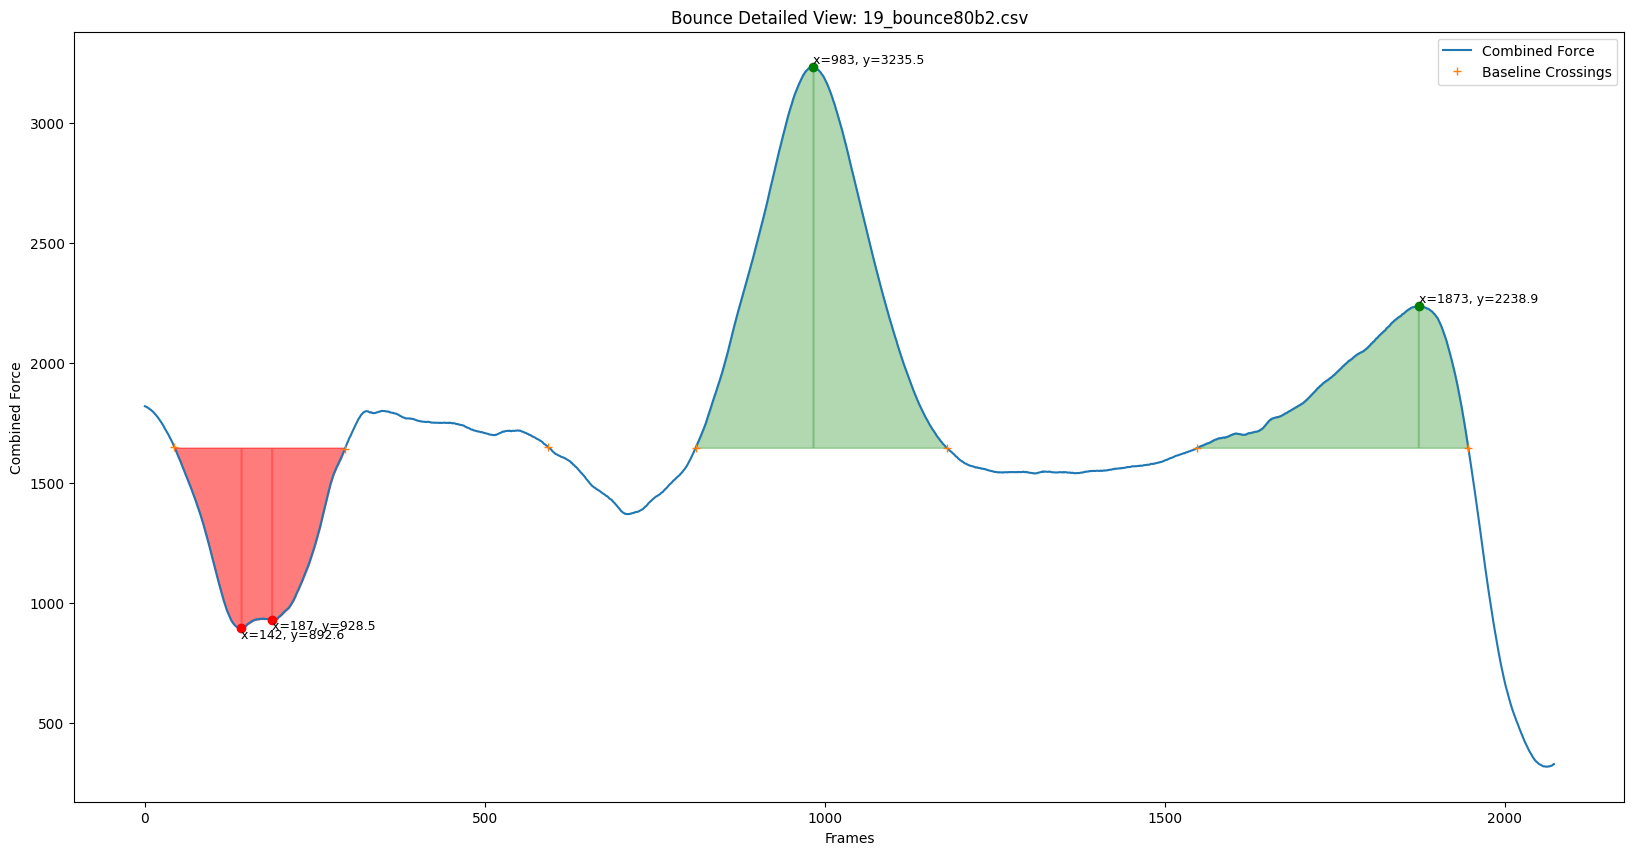

Processing 19_bounce80b3.csv:  33%|███▎      | 8/24 [00:02<00:04,  3.68it/s]

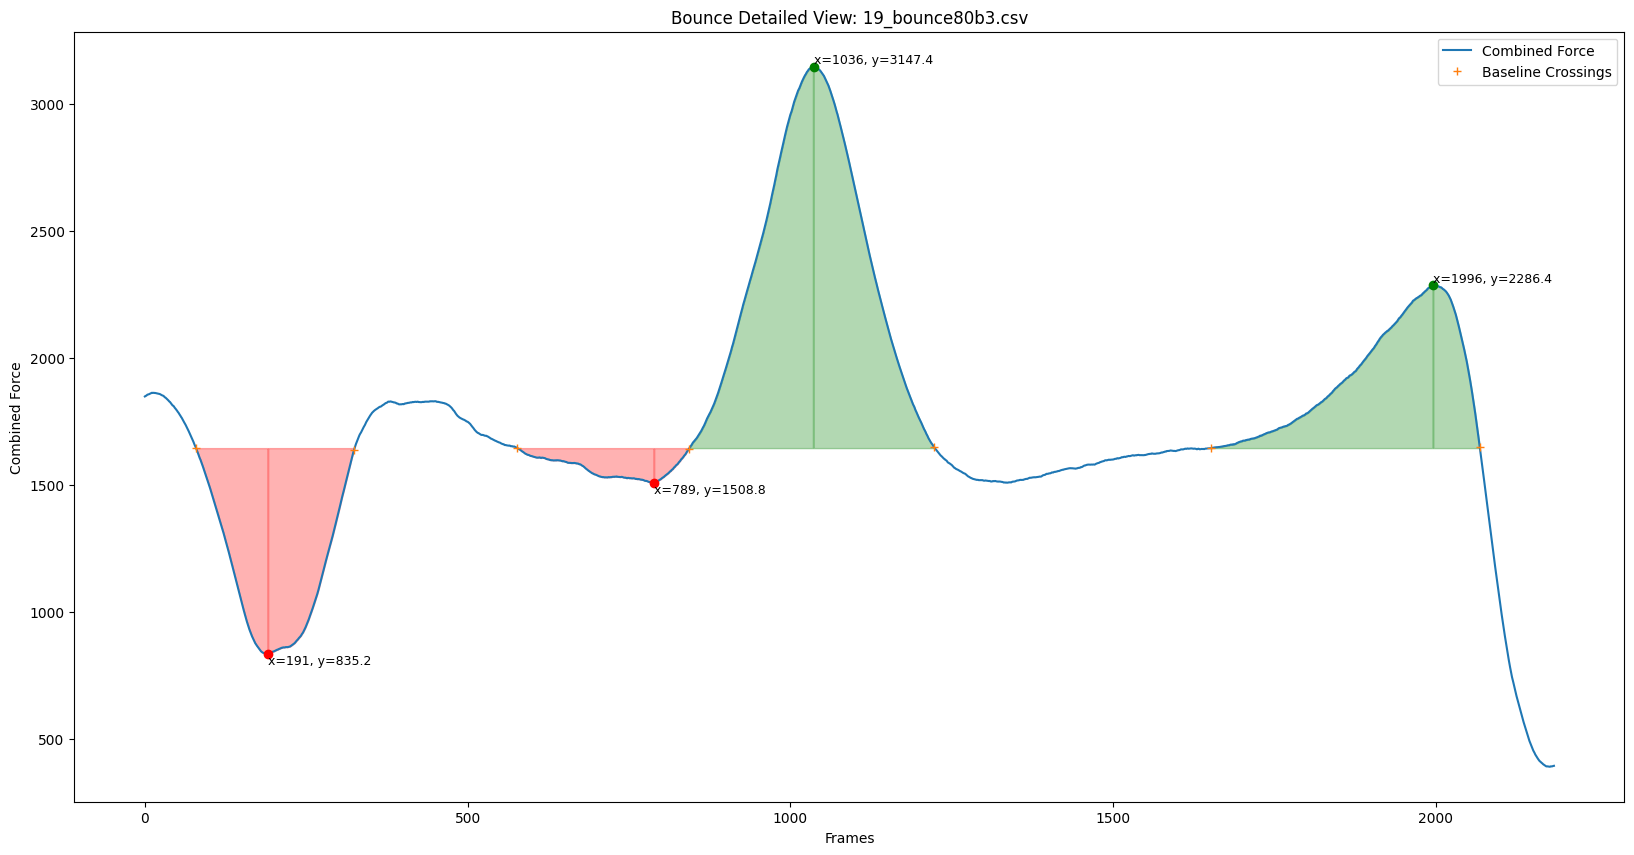

Processing 19_bounce80nb1.csv:  38%|███▊      | 9/24 [00:02<00:04,  3.72it/s]

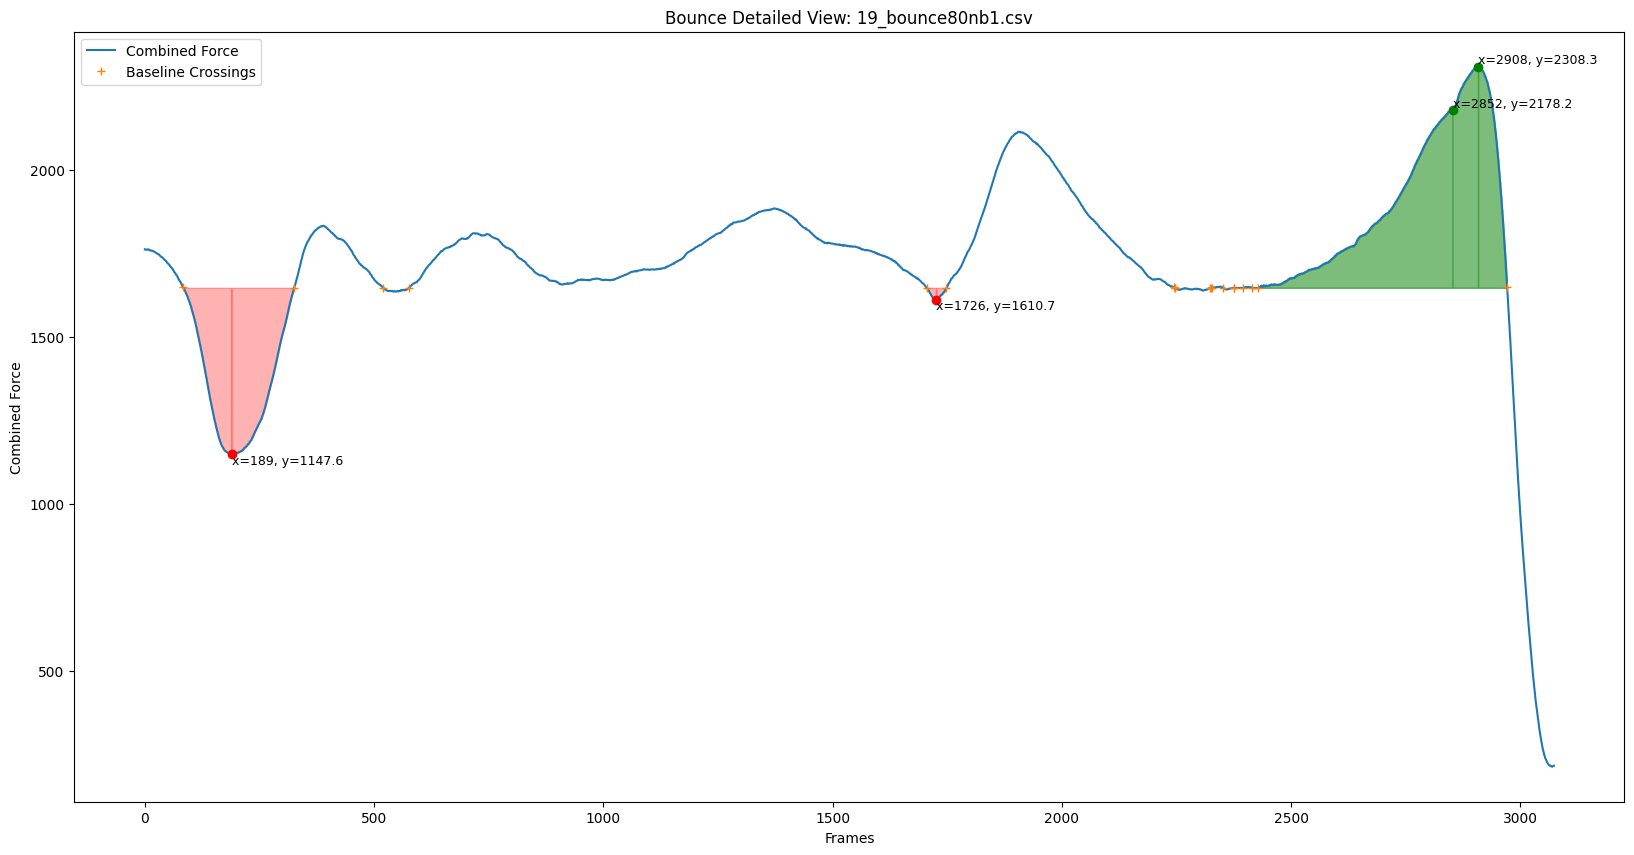

Processing 19_bounce80nb2.csv:  42%|████▏     | 10/24 [00:02<00:04,  3.34it/s]

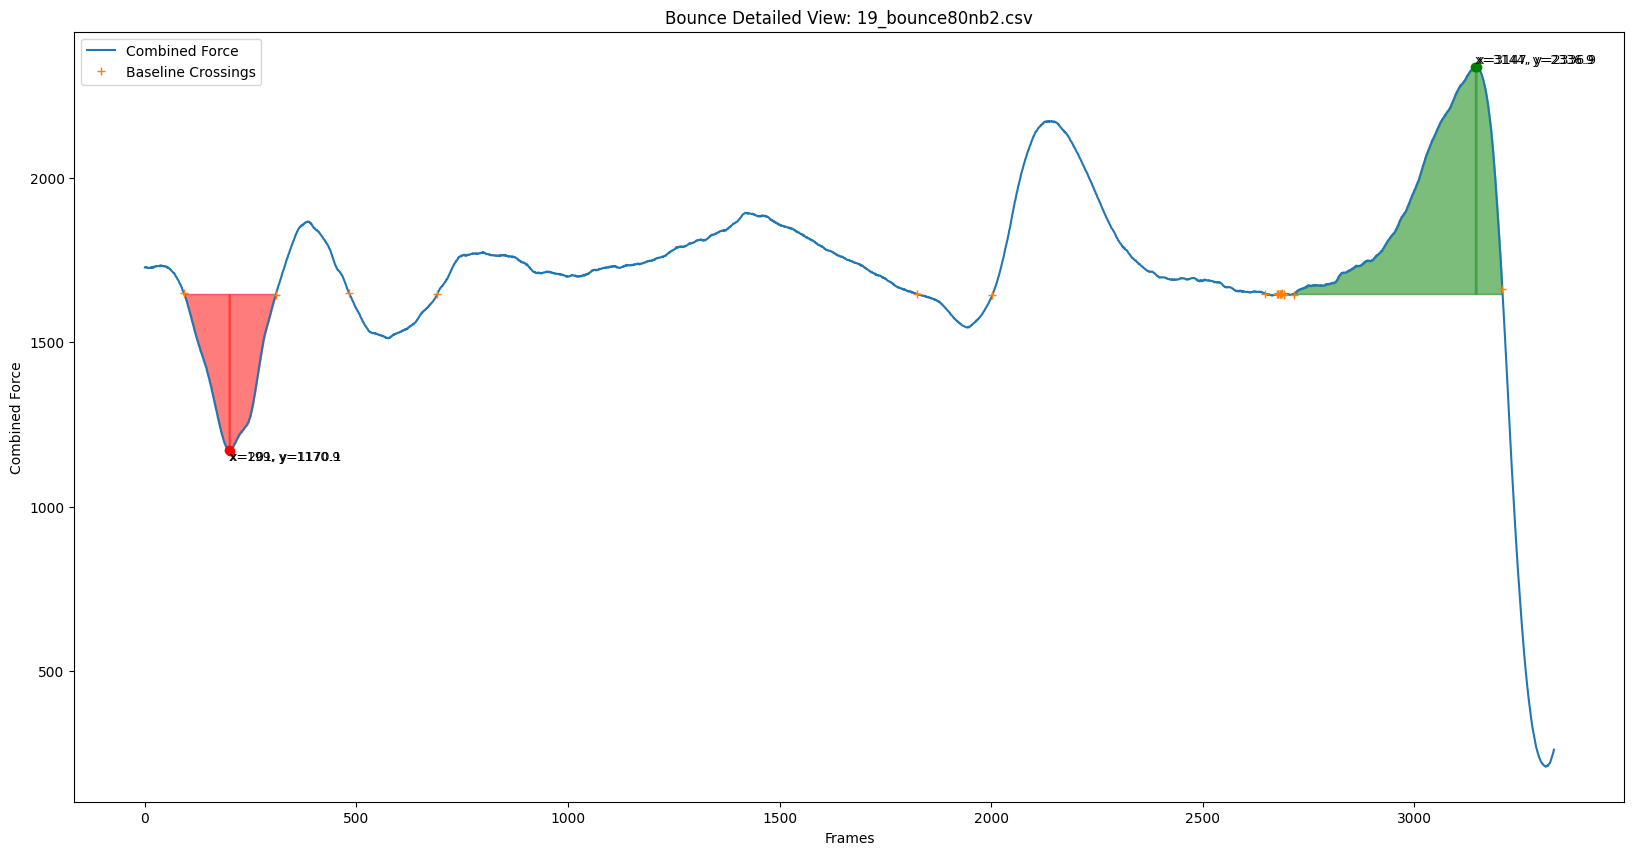

Processing 19_bounce80nb3.csv:  46%|████▌     | 11/24 [00:03<00:03,  3.43it/s]

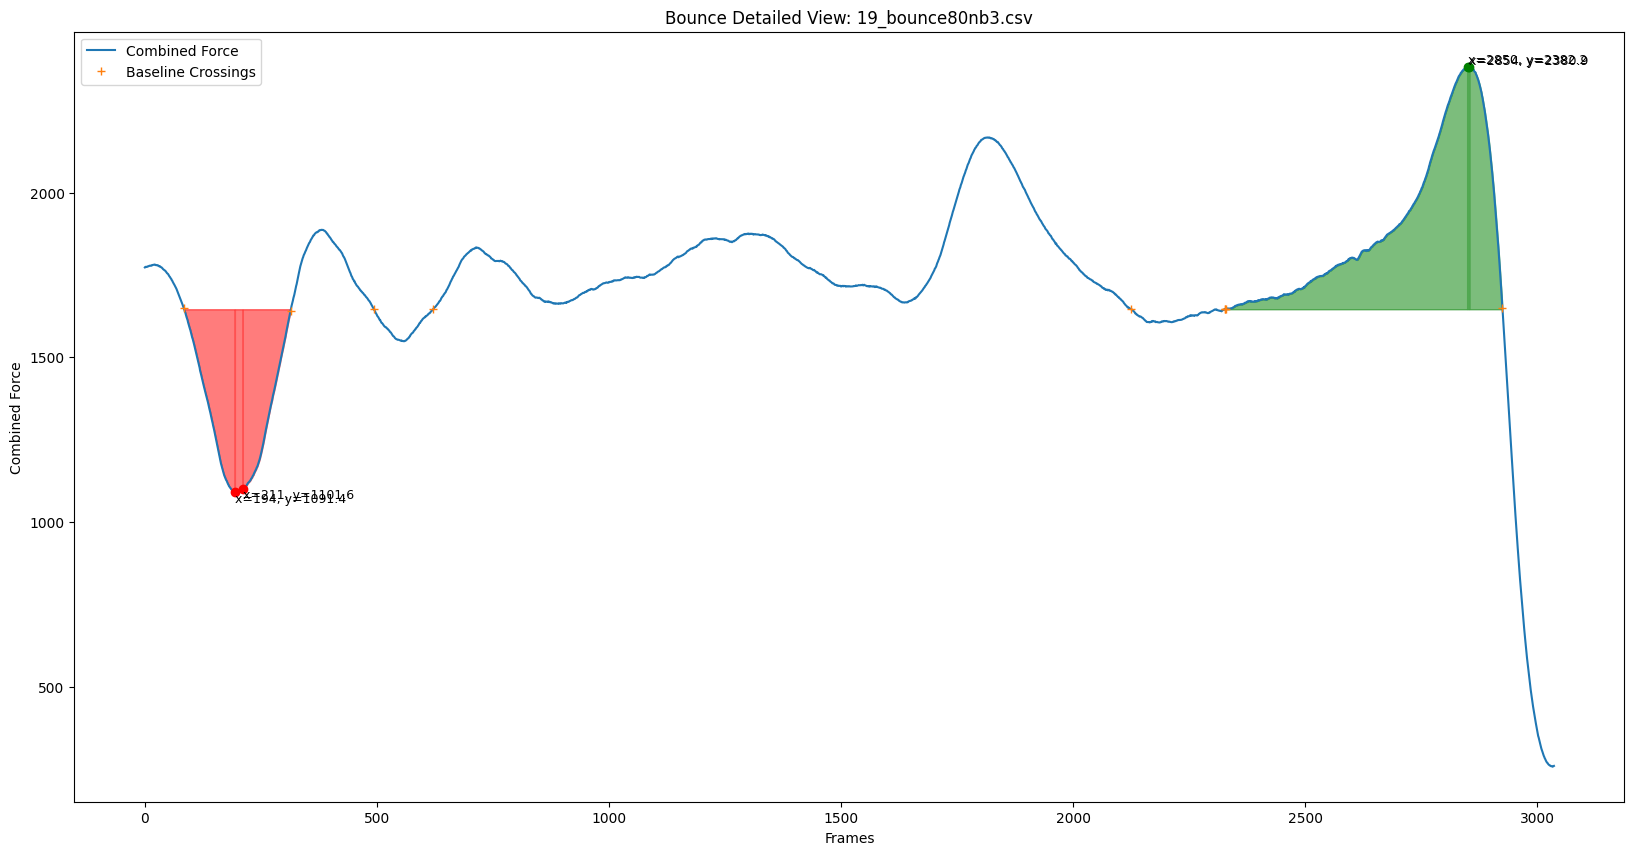

Processing 19_fastb1.csv:  50%|█████     | 12/24 [00:03<00:03,  3.50it/s]     

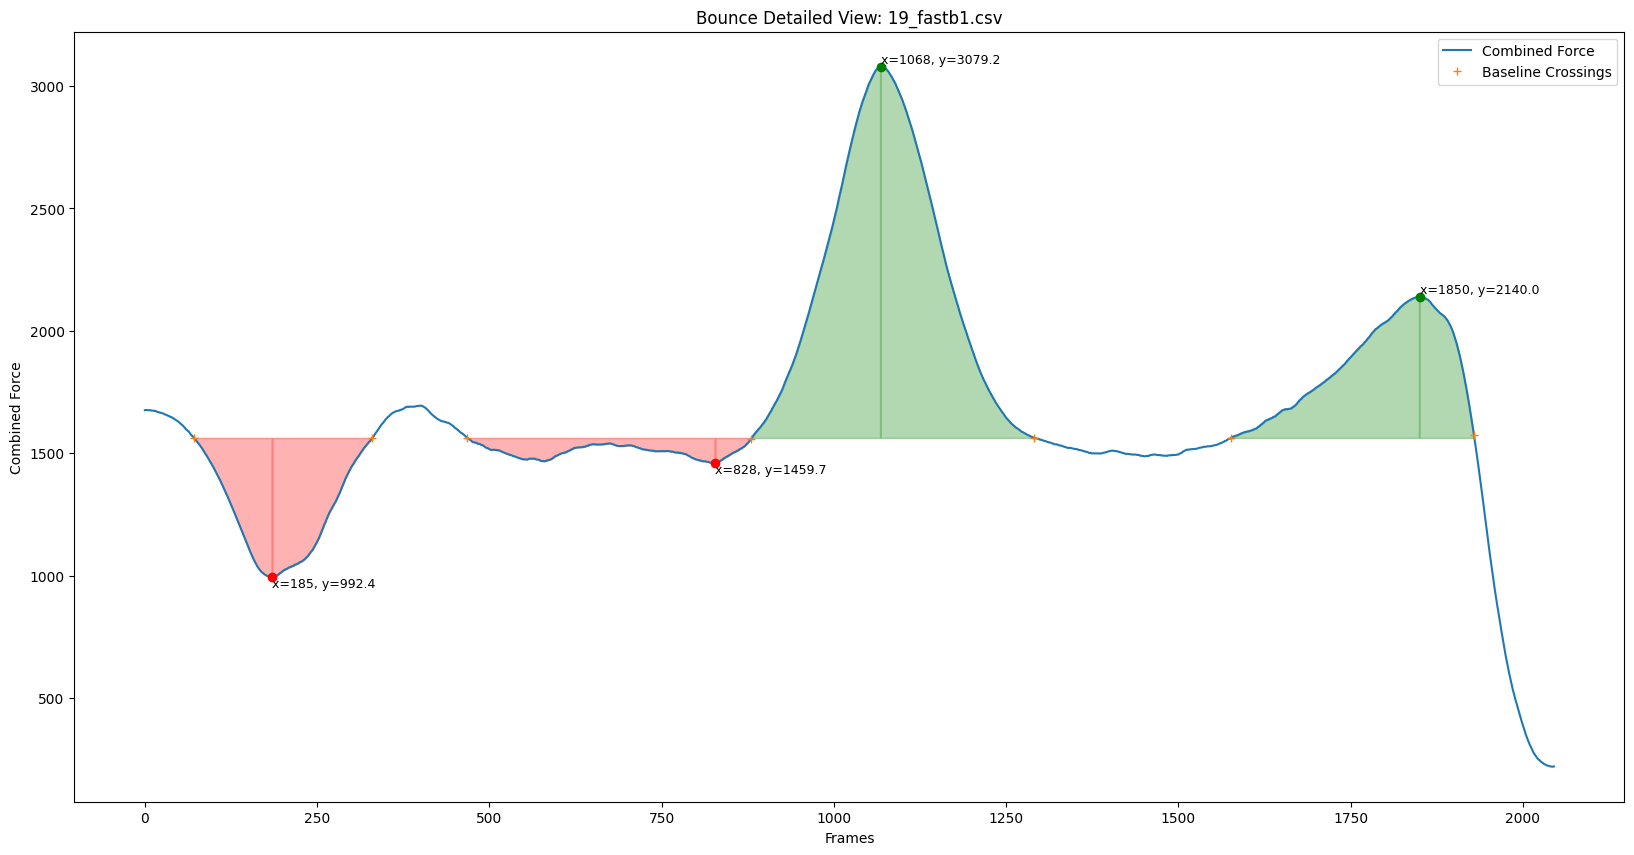

Processing 19_fastb2.csv:  54%|█████▍    | 13/24 [00:03<00:03,  3.55it/s]

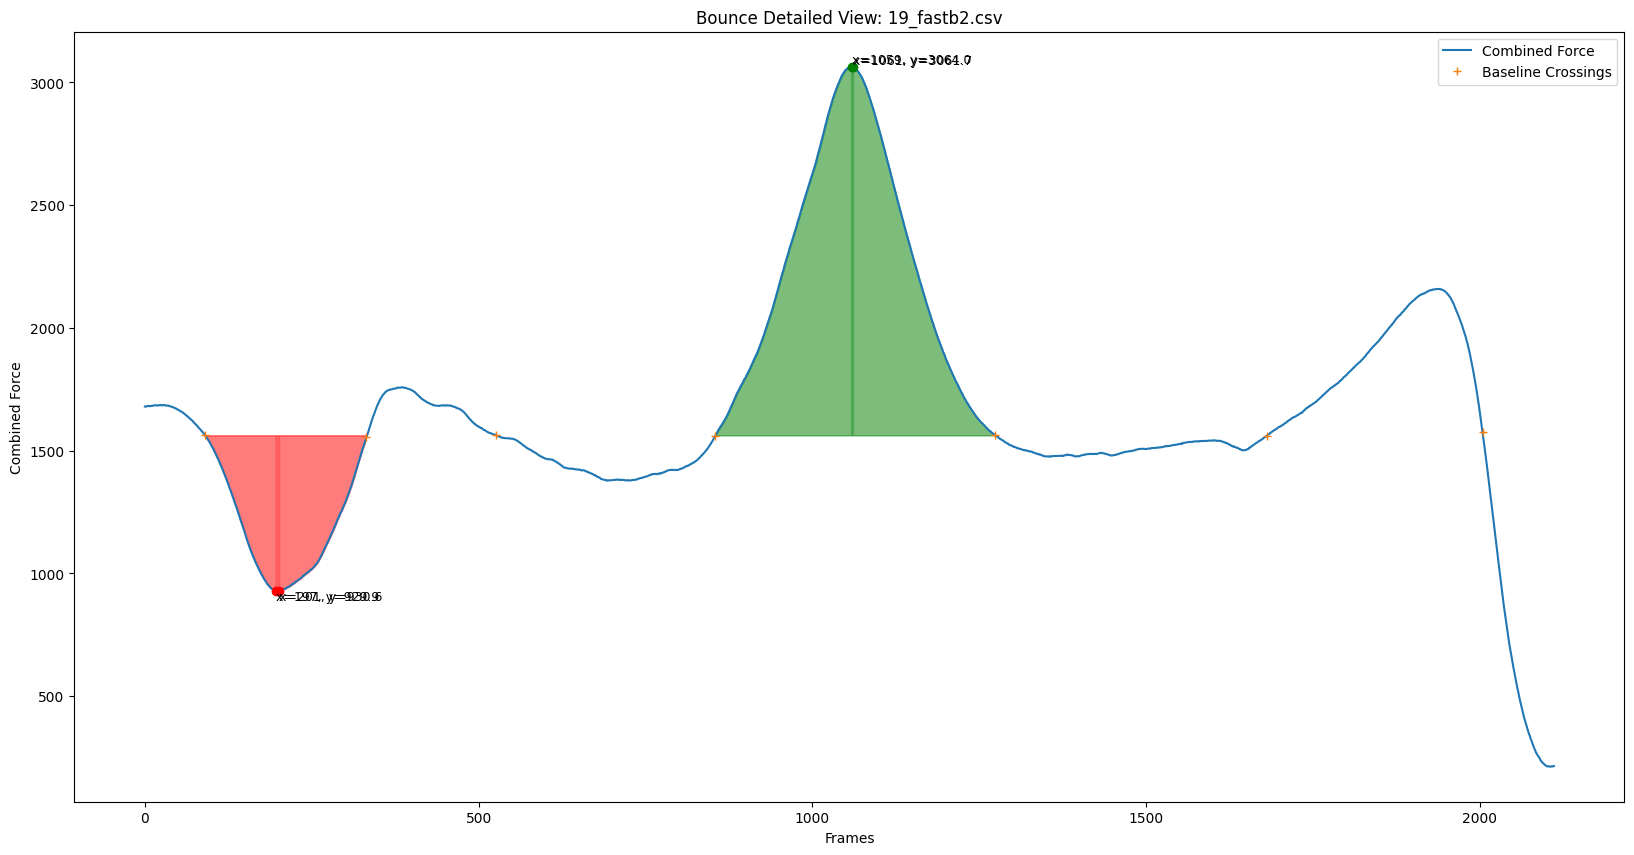

Processing 19_fastb3.csv:  58%|█████▊    | 14/24 [00:03<00:02,  3.58it/s]

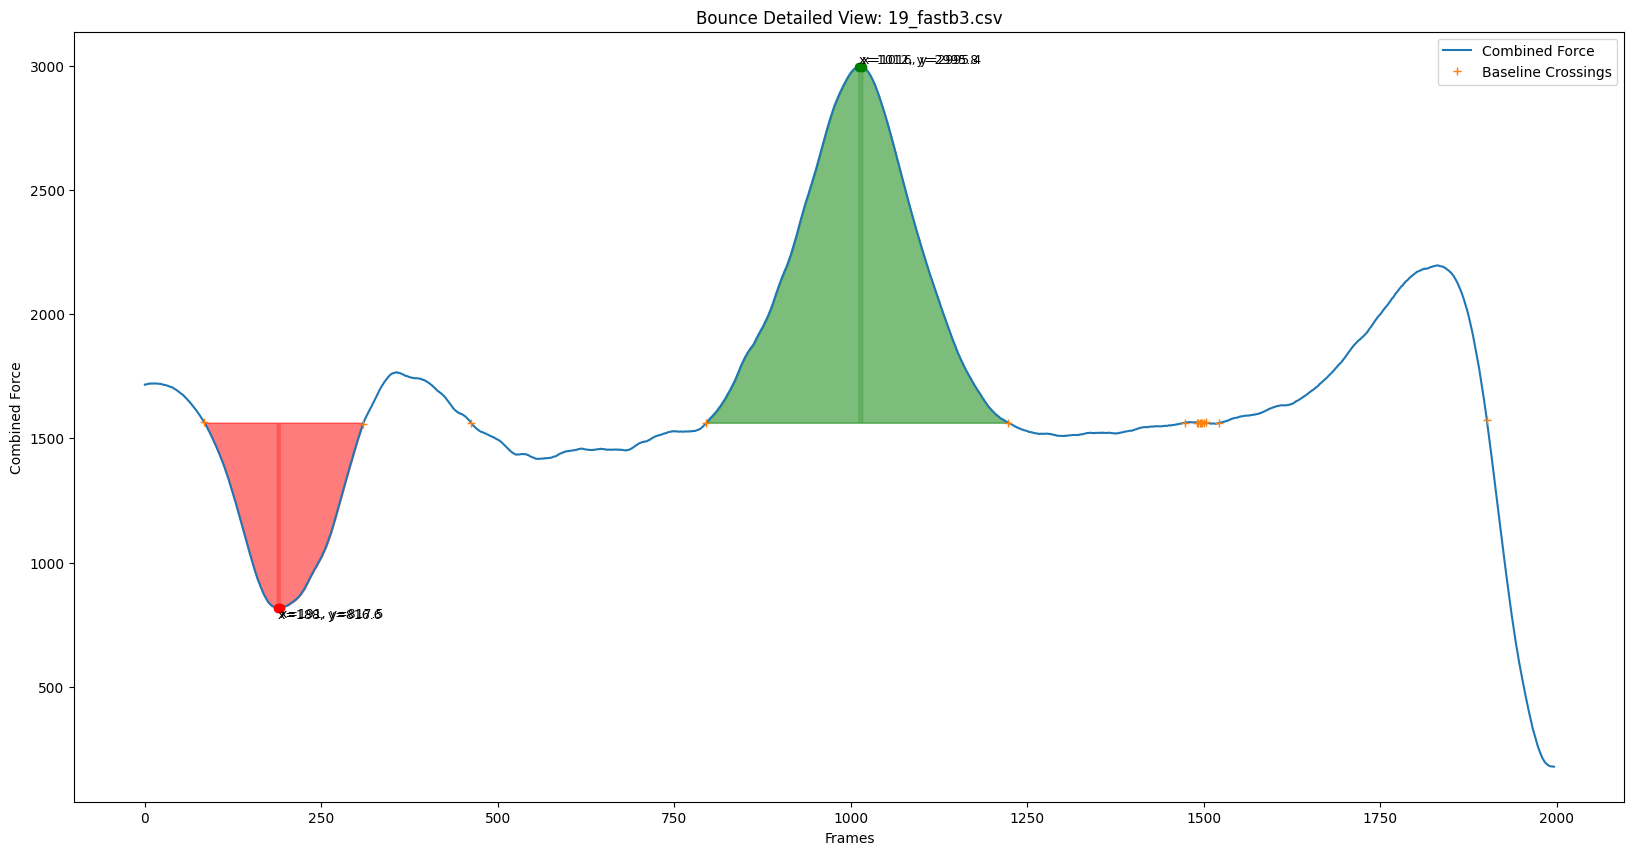

Processing 19_fastnb1.csv:  62%|██████▎   | 15/24 [00:04<00:02,  3.53it/s]

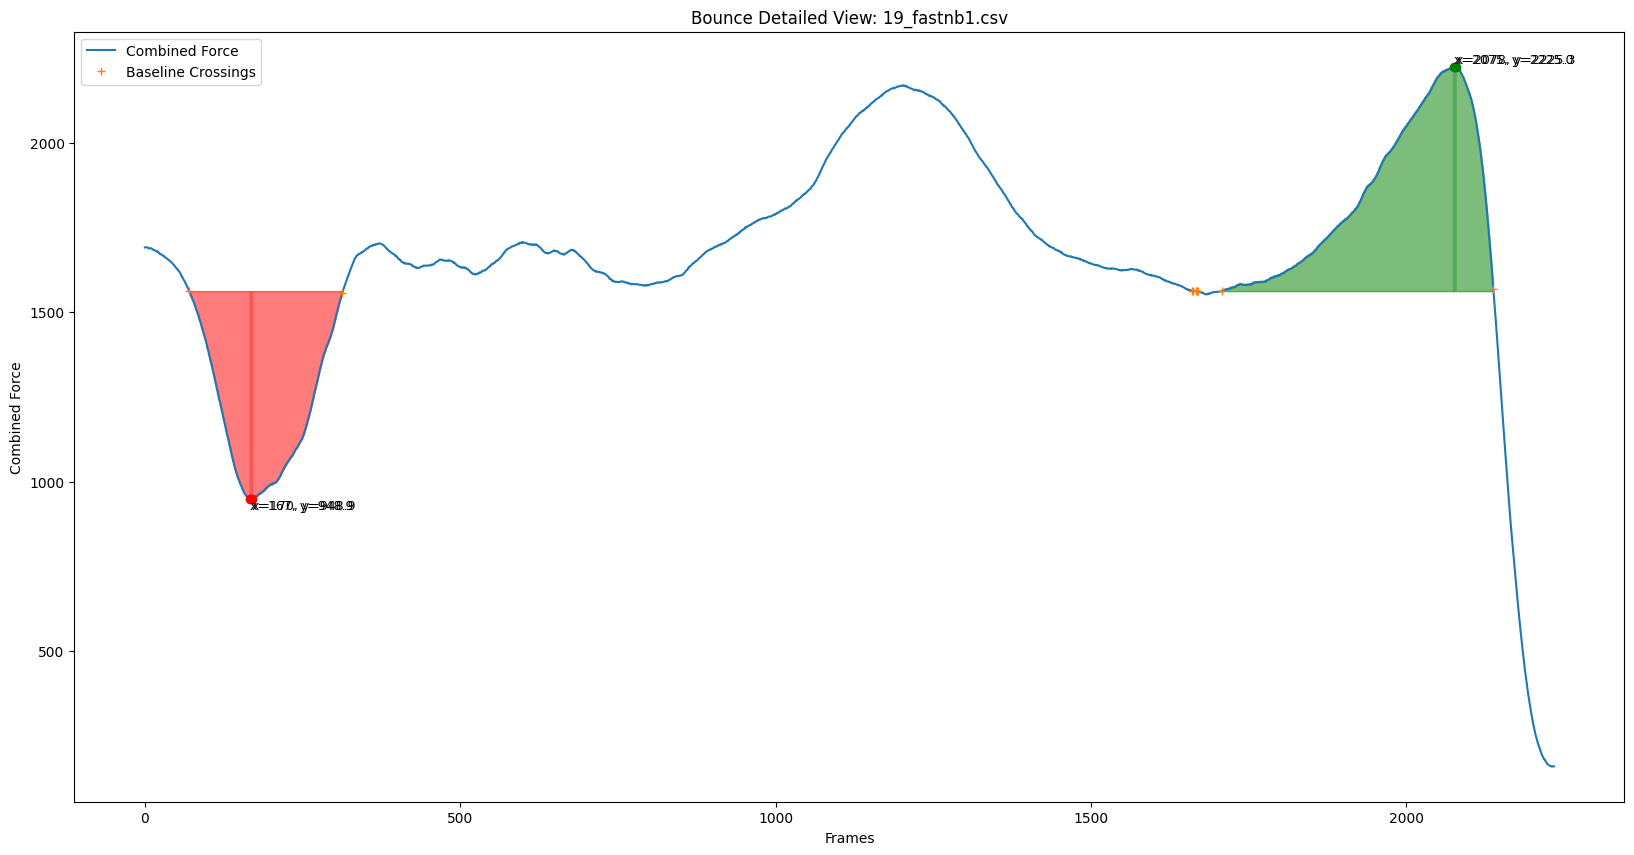

Processing 19_fastnb2.csv:  67%|██████▋   | 16/24 [00:04<00:02,  3.62it/s]

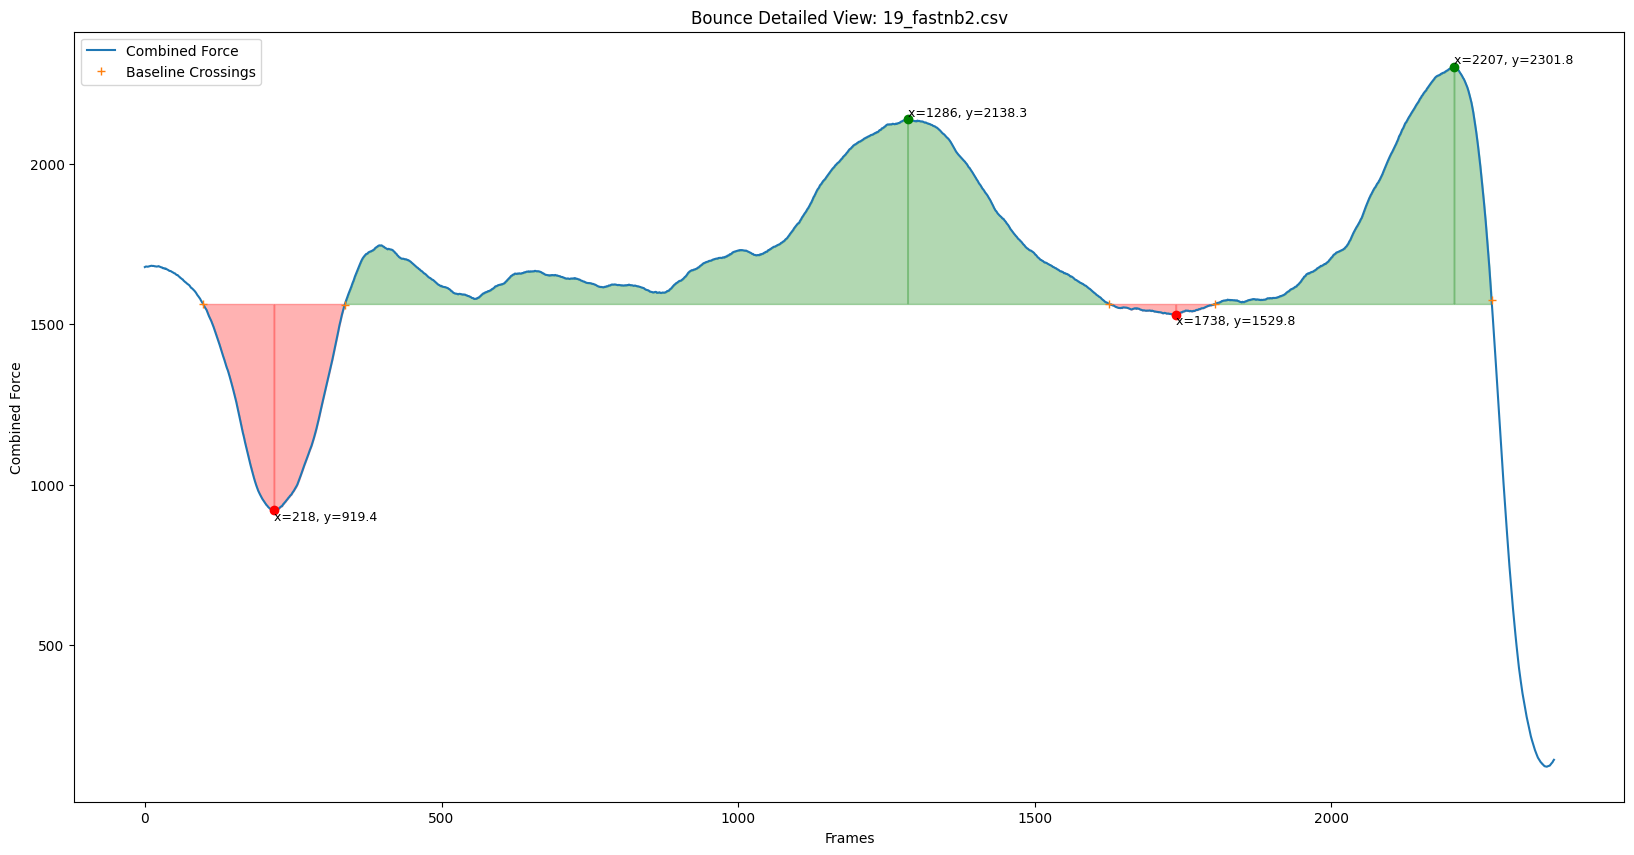

Processing 19_fastnb3.csv:  71%|███████   | 17/24 [00:04<00:01,  3.70it/s]

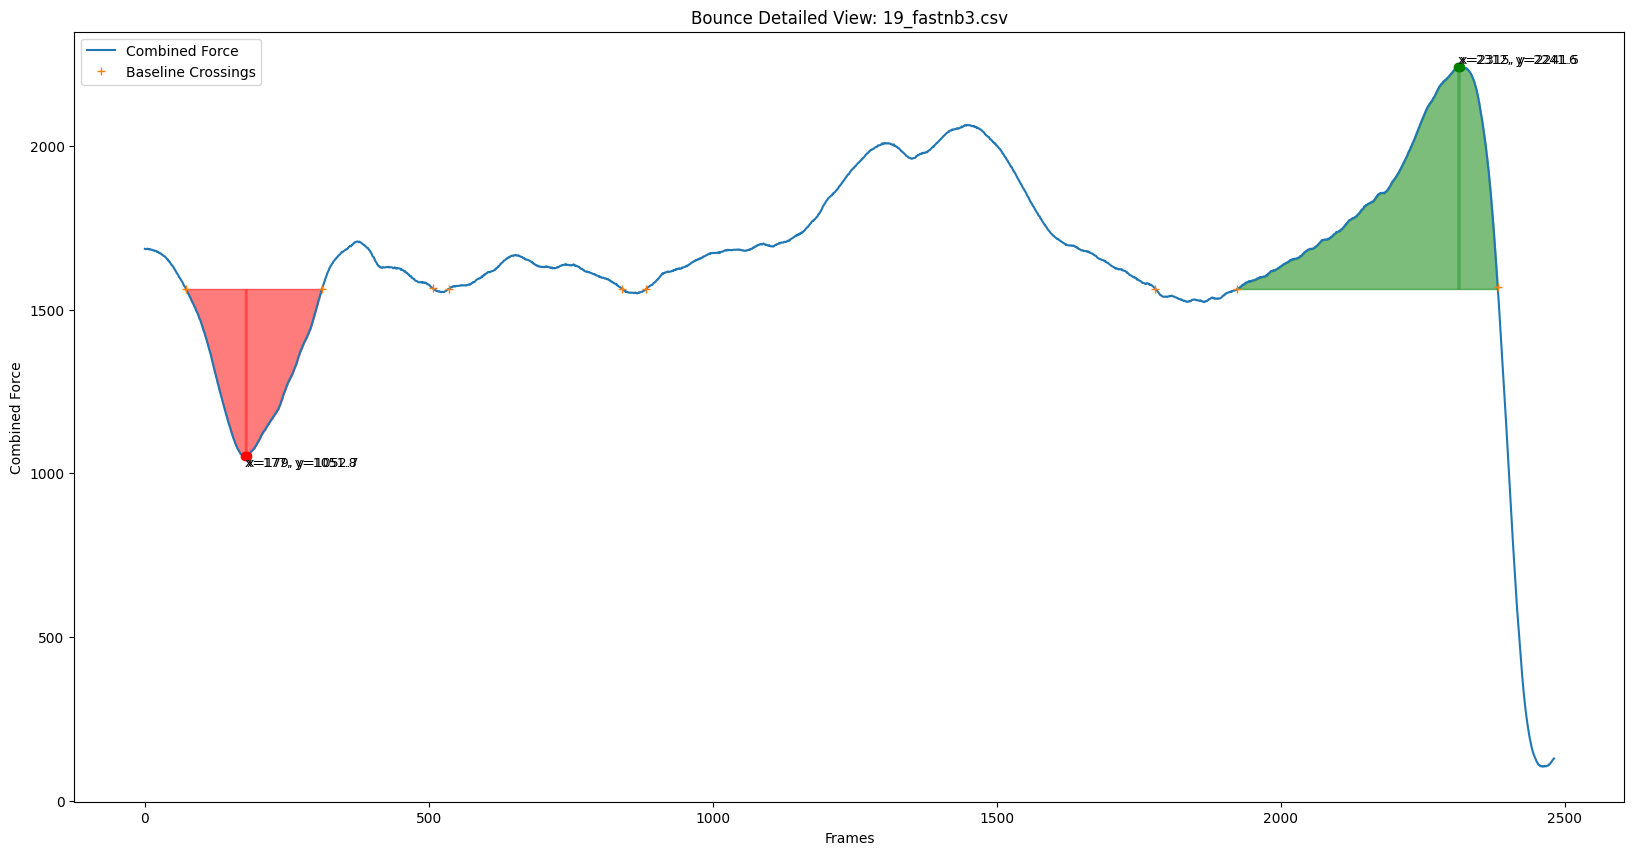

Processing 19_slowb1.csv:  75%|███████▌  | 18/24 [00:05<00:01,  3.74it/s] 

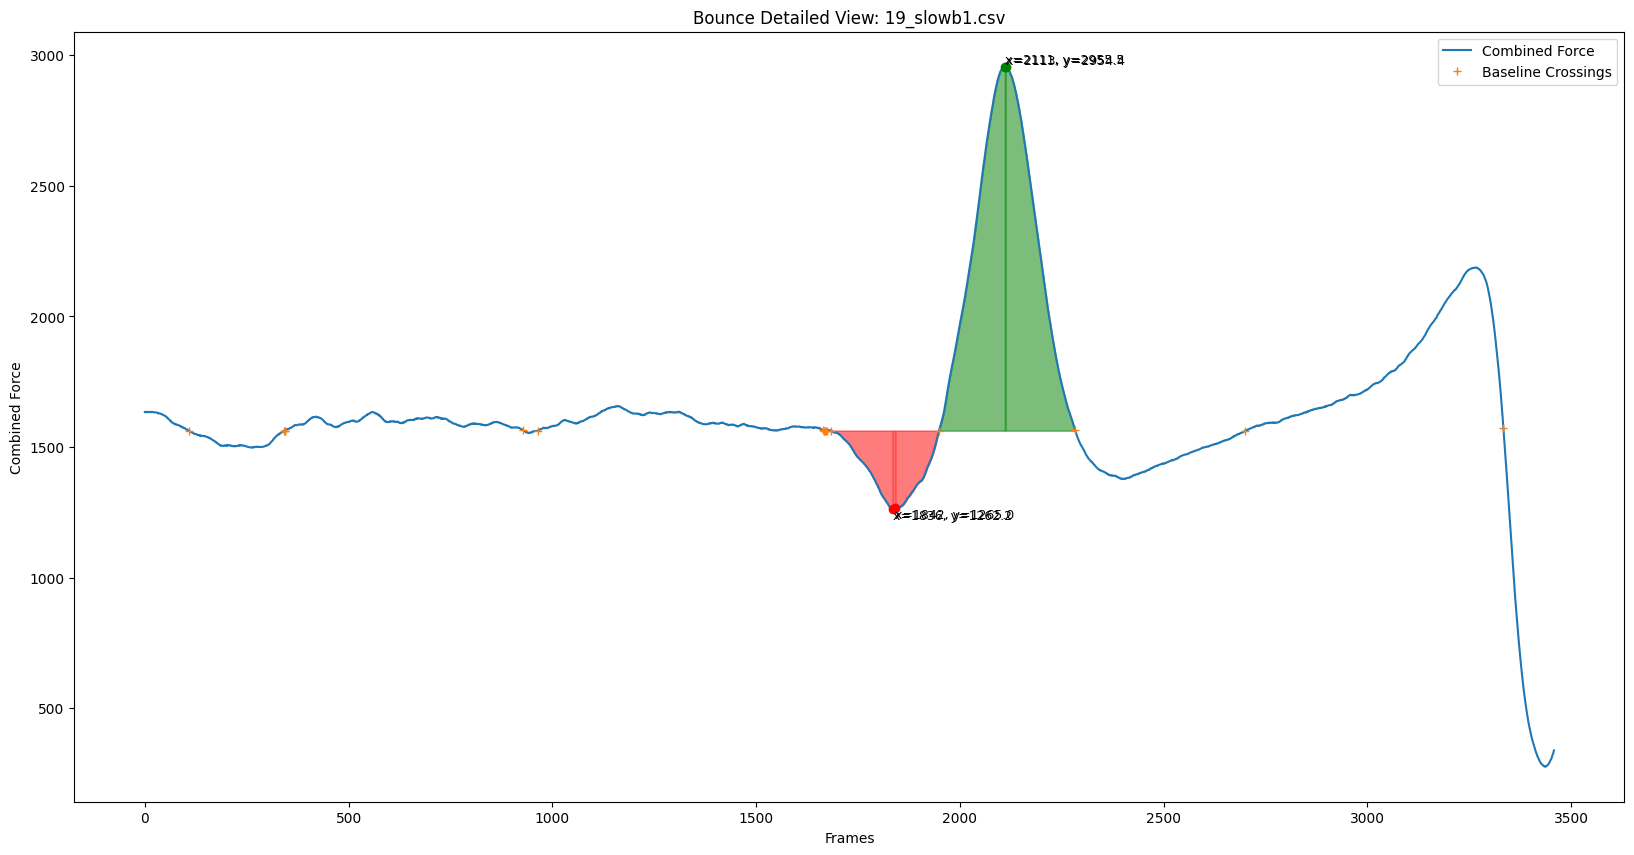

Processing 19_slowb2.csv:  79%|███████▉  | 19/24 [00:05<00:01,  3.67it/s]

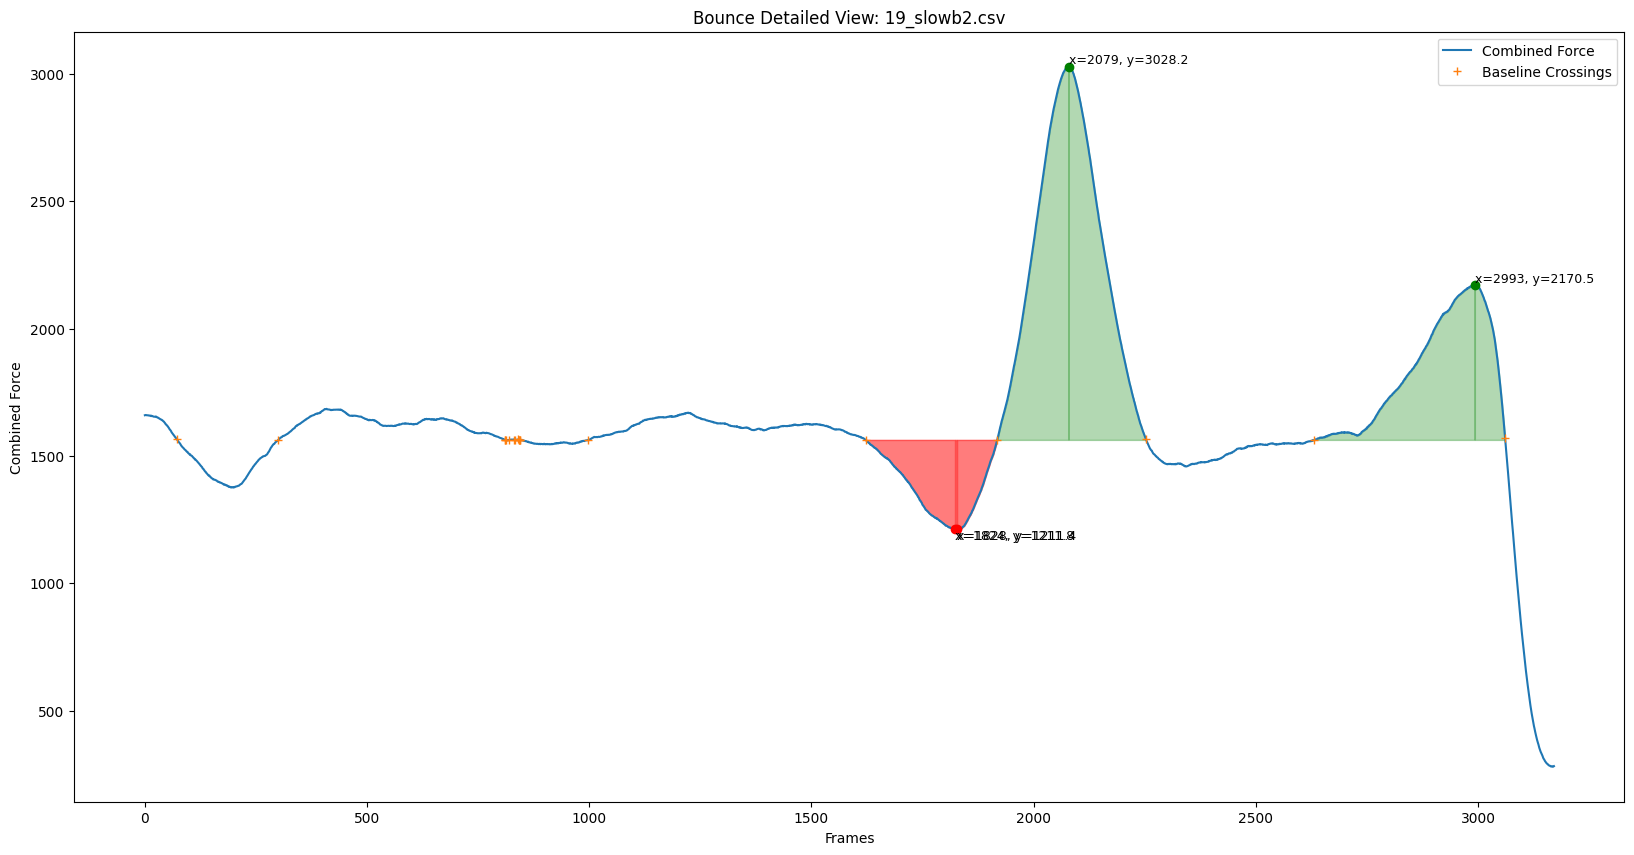

Processing 19_slowb3.csv:  83%|████████▎ | 20/24 [00:05<00:01,  3.62it/s]

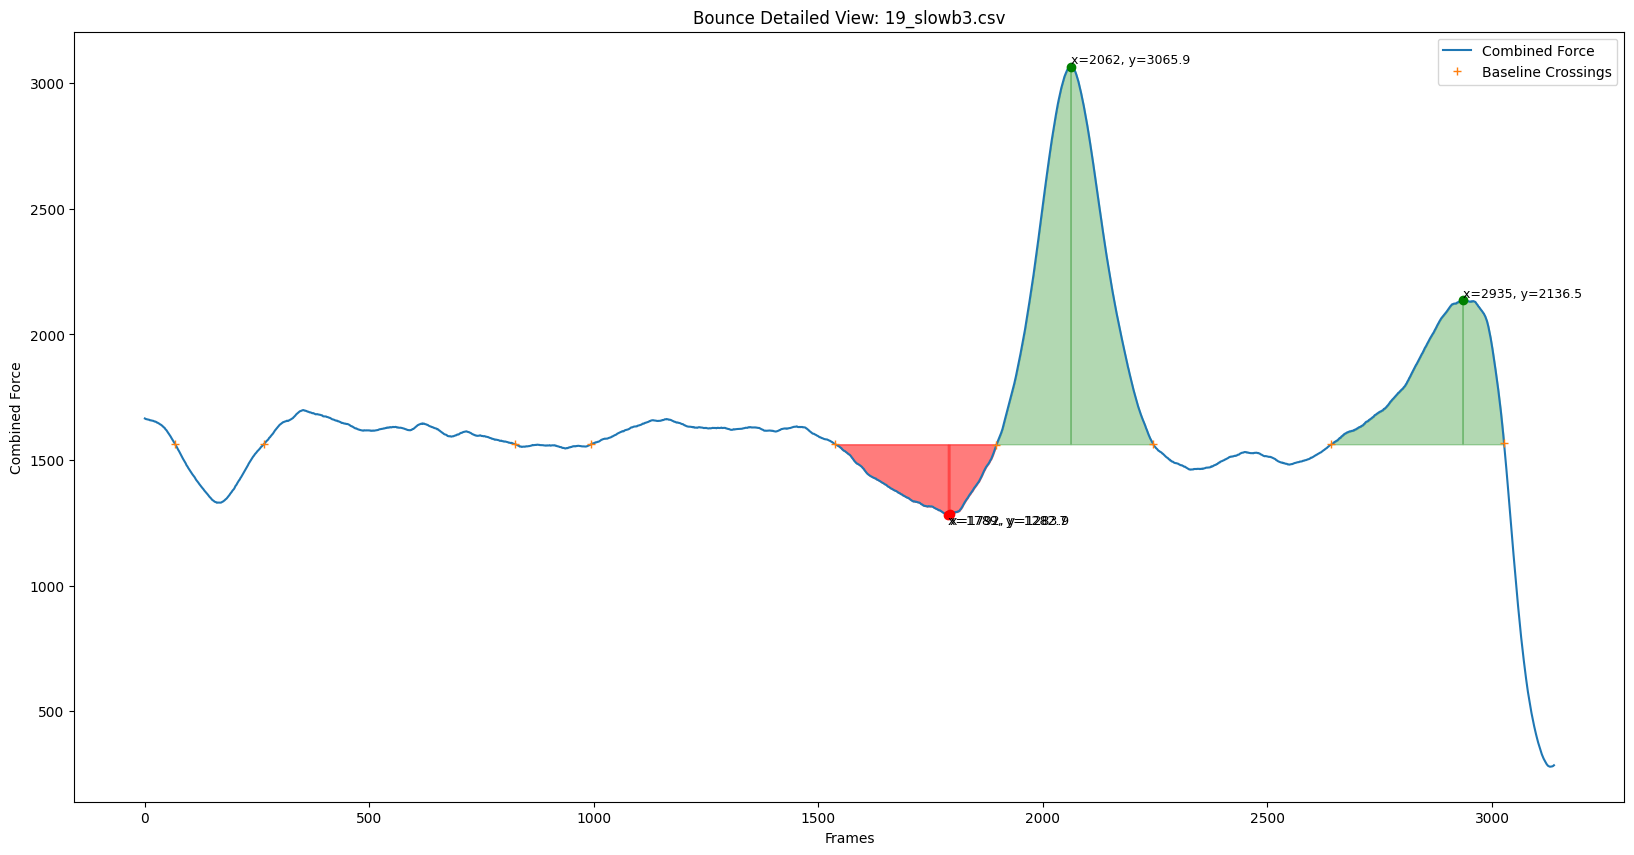

Processing 19_slownb1.csv:  88%|████████▊ | 21/24 [00:05<00:00,  3.63it/s]

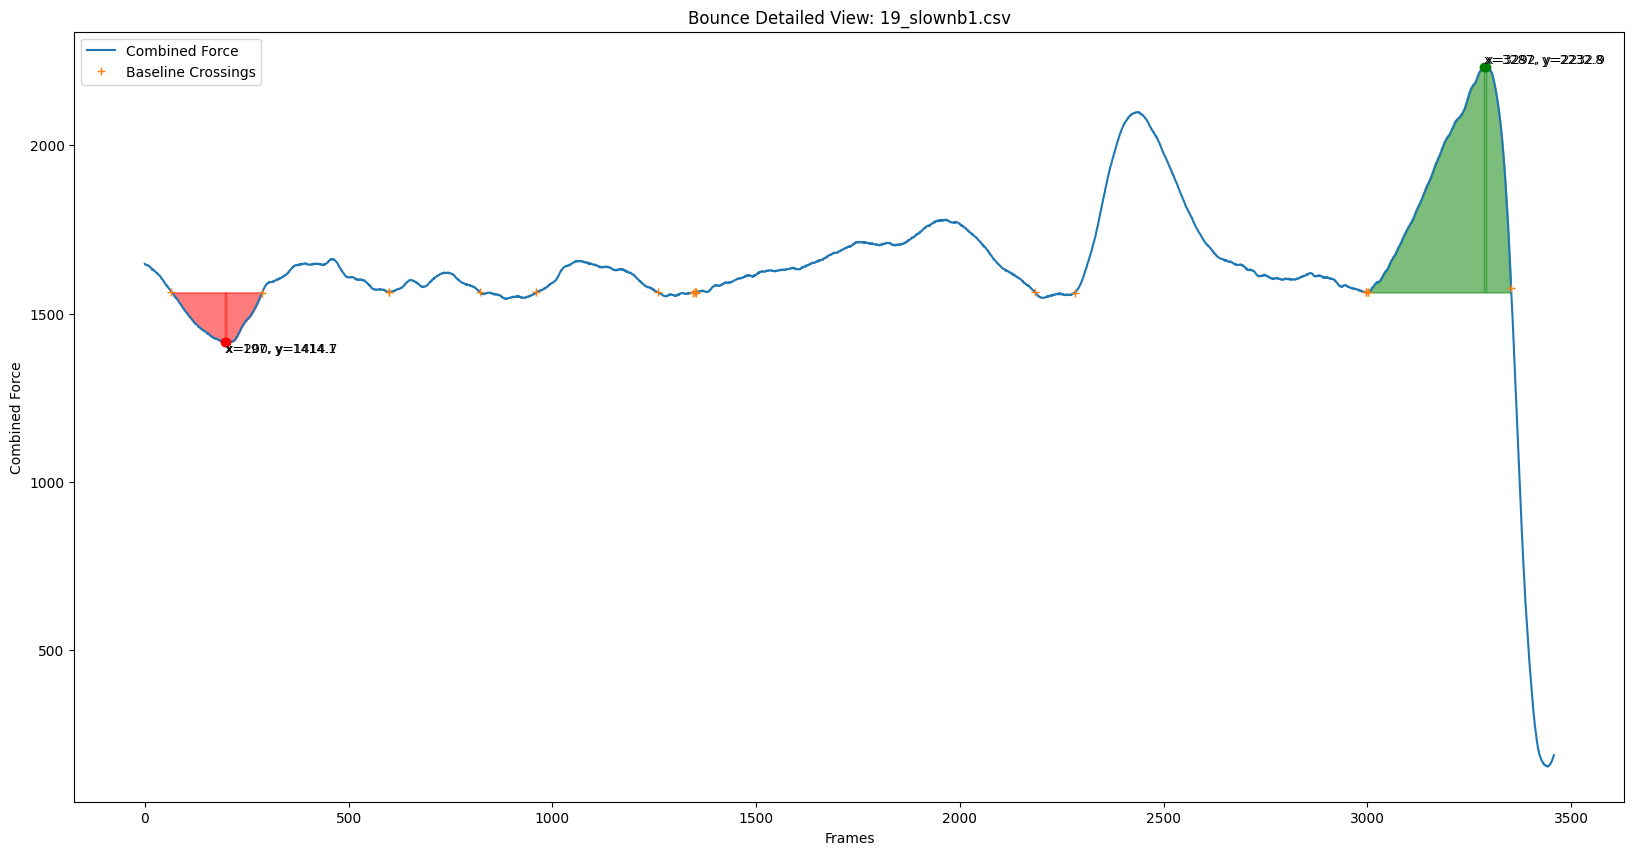

Processing 19_slownb2.csv:  92%|█████████▏| 22/24 [00:06<00:00,  3.61it/s]

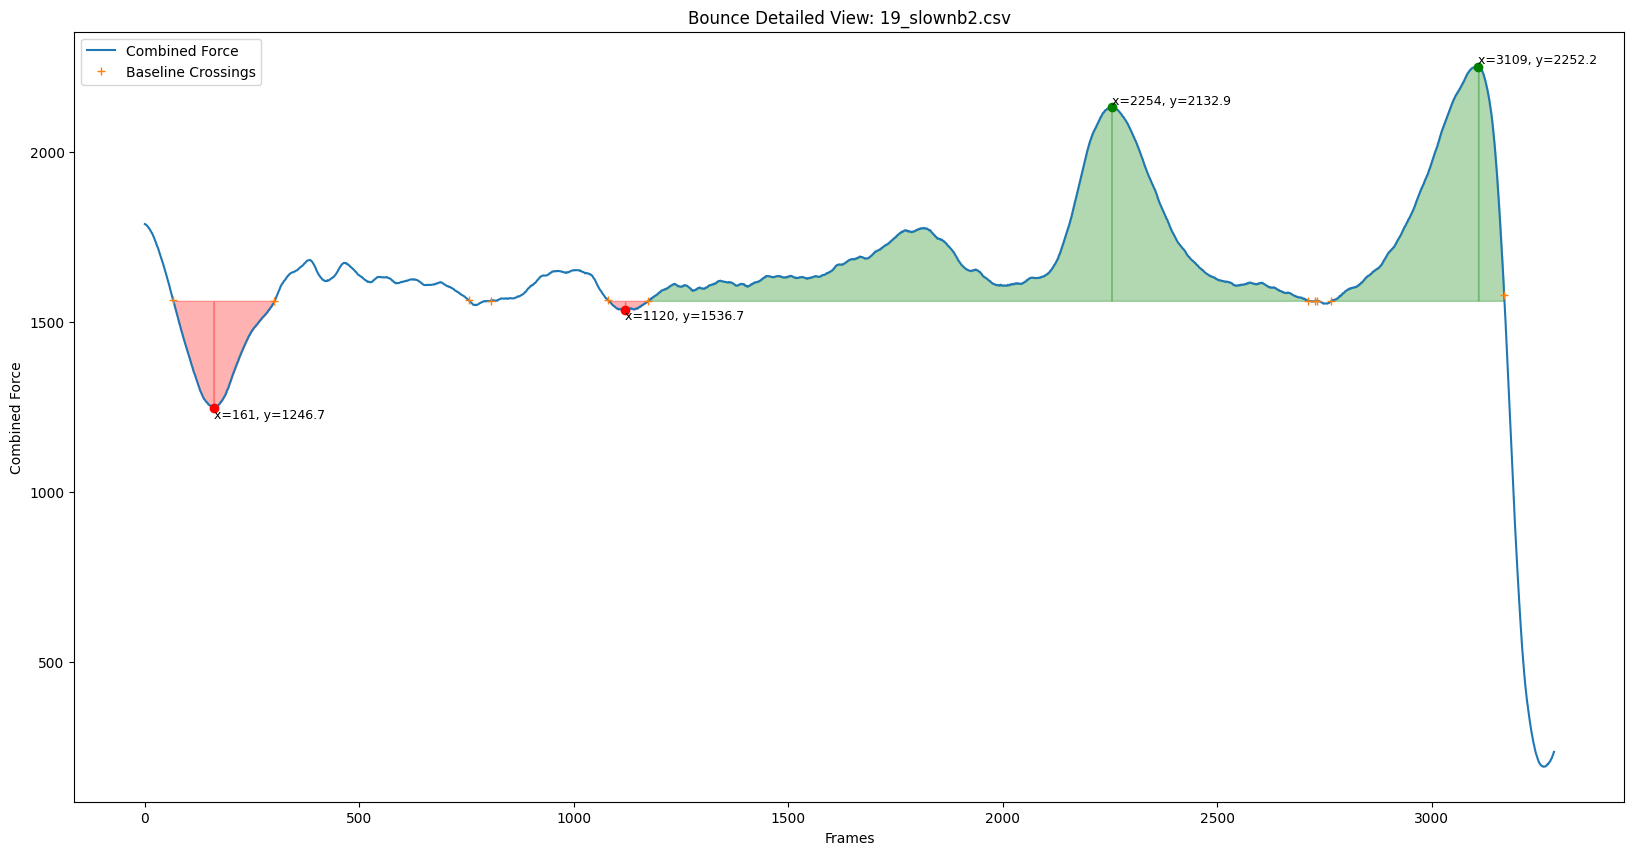

Processing 19_slownb3.csv:  96%|█████████▌| 23/24 [00:06<00:00,  3.62it/s]

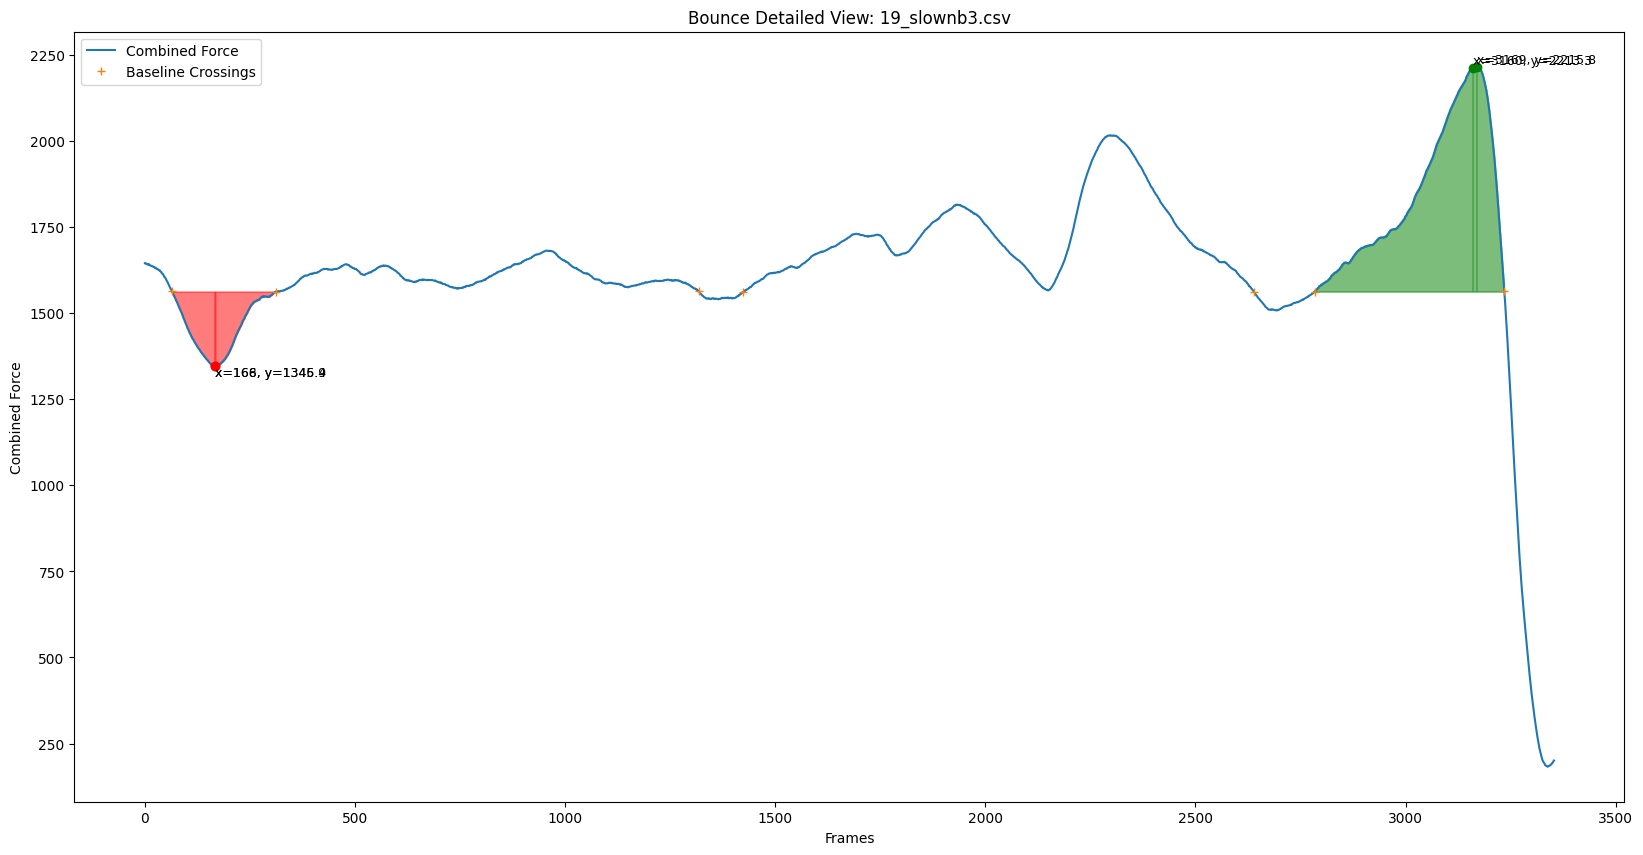

Finished 19_slownb3.csv: 100%|██████████| 24/24 [00:06<00:00,  3.56it/s]  

Number of bounce files in bounce_dict_70: 3
Number of bounce files in no_bounce_dict_70: 3
Number of bounce files in bounce_dict_80: 3
Number of bounce files in no_bounce_dict_80: 3
Number of bounce files in bounce_dict_slow: 3
Number of bounce files in no_bounce_dict_slow: 3
Number of bounce files in bounce_dict_fast: 3
Number of bounce files in no_bounce_dict_fast: 3


In [4]:
boin.analyse_bounce(id=19, plot=True)